# Projet IA

# Thème:Smart city




# SOMMAIRE


## I.  Résumé 

## II.  Introduction

## III.  Démarche

## IV. Résultats

## V.  Interpretation

## VI.  Conclusion

## I.  Résumé 

L'objectif de cette étude est de realiser une analyse sur les validations des titres de transports dans les réseaux de surface en îles-de-france.Pour ce faire,je suis passée de la récupération de la donnéé à la synthèse en passant par une analyse(manipulation, statistique) et des visualisations.

J'ai commencé par récupérer les données(validations sur le réseau de surface 1er et 2ème trimestre 2021) sur le site du STIF et par la suite je les ai chargé sur mon notebook.

J'ai ensuite fait des manipulations pour qu'elles soient plus propres et des conversions car les types de variables n'étaient pas adéquats.

Les deux jeux de données nettoyés, j'ai procédé à une concatenation.

Un petit nettoyage supplémentaire  a été fait pour préparer mes données aux visualisations.

J'ai enfin exporté mes données au format csv pour faire quelques visualisations sur TABLEAU.

L'analyse des validations permettra de connaître les titres de transports les plus utilisés,le trafic par ligne  dans le but de proposer une offre convenante.









## II.  Introduction

Île-de-France Mobilités, anciennement STIF, est l'autorité organisatrice qui contrôle et coordonne les différentes entreprises de transport opérant sur le réseau de transports en commun francilien et la région Île-de-France.

Depuis 2016, le STIF donne accès à certaines de ses données brutes via un portail opendata .
Le STIF exploite à la fois un réseau de surface(bus,Tram) et un réseau ferroviaire (train, métro, RER, transilien).
Cette analyse porte exclusivement sur le réseau de surface.

La problématique ici est la  validation des titres de transports sur ce réseau(quels sont les titres les plus validés? quelles sont les lignes avec le plus de validations?quels sont les mois de pointe?)

## III.  Démarche

Le STIF fournit les données suivantes sur le réseau de surface : trafic journalier par arrêt (nombre d'enregistrements par jour et par type de billet), coordonnées géographiques (classées par arrêt ou par ligne de transport), référentiels de tous les arrêts (classés par arrêt ou par ligne de transport).

Les données sur le trafic quotidien sont disponibles de 2015 à 2021.

Nous concentrerons notre analyse sur l'année 2021 .

Pour l'année 2021, les données sont réparties sur 2 jeux de données, correspondant au 1er et au 2ème trimestre de l'année.

Vous trouverez ci-dessous les liens vers les ensembles de données susmentionnés :

- [Trafic journalier 1er trimestre 2021](https://data.iledefrance-mobilites.fr/explore/dataset/validations-sur-le-reseau-de-surface-nombre-de-validations-par-jour-1er-trimestr/information/)
- [Trafic journalier 2ème trimestre 2021](https://data.iledefrance-mobilites.fr/explore/dataset/validations-sur-le-reseau-de-surface-nombre-de-validations-par-jour-2eme-trimest/information/)

### Importer les données

In [1]:
import numpy as np           #importation des librairies
import pandas as pd  


In [2]:
data1=pd.read_csv("validations-sur-le-reseau-de-surface-nombre-de-validations-par-jour-1er-trimestr.csv",sep=";") #chargement des données
data1.head() #affiche les 5 premières lignes du dataset
##nombre de validations/jour sur les reseaux de surface 1er trimestre 2021

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,LIBELLE_LIGNE,ID_GROUPOFLINES,CATEGORIE_TITRE,NB_VALD
0,2021-01-15,100,520,1,VILLIERS SUR MARNE (Les Hauts de Bry)-BRY SUR ...,1005201,IMAGINE R,310
1,2021-01-15,100,520,1,VILLIERS SUR MARNE (Les Hauts de Bry)-BRY SUR ...,1005201,NON DEFINI,24
2,2021-01-15,100,521,215,PARIS (Porte de Montreuil) - VINCENNES RER - R...,100521215,NON DEFINI,92
3,2021-01-15,100,524,1,La Navette,1005241,?,Moins de 5
4,2021-01-15,100,545,1,NOISY LE SEC (Gare RER)-BAGNOLET (Louise Michel),1005451,AUTRE TITRE,5


In [3]:
data1.tail() #affiche les  5 dernières lignes du data1

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,LIBELLE_LIGNE,ID_GROUPOFLINES,CATEGORIE_TITRE,NB_VALD
680697,2021-03-31,522,522,483,NON DEFINI,A00002,IMAGINE R,1635
680698,2021-03-31,522,522,483,NON DEFINI,A00002,NON DEFINI,404
680699,2021-03-31,522,522,9,NON DEFINI,A00005,FGT,13
680700,2021-03-31,522,522,9,NON DEFINI,A00005,IMAGINE R,26
680701,2021-03-31,522,522,9,NON DEFINI,A00005,NAVIGO,133


In [4]:
data1.shape #nombre d'observations et de variables

(680702, 8)

In [13]:
data1.info() #stucture des données 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596001 entries, 0 to 596000
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   JOUR             553745 non-null  object 
 1   CODE_STIF_TRNS   596001 non-null  int64  
 2   CODE_STIF_RES    553745 non-null  object 
 3   CODE_STIF_ARRET  553745 non-null  object 
 4   LIBELLE_ARRET    553745 non-null  object 
 5   ID_REFA_LDA      551667 non-null  float64
 6   CATEGORIE_TITRE  596001 non-null  object 
 7   NB_VALD          553745 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.4+ MB


In [5]:
data1.dtypes  #types des variables

JOUR                object
CODE_STIF_TRNS       int64
CODE_STIF_RES       object
CODE_STIF_ARRET     object
LIBELLE_ARRET       object
ID_REFA_LDA        float64
CATEGORIE_TITRE     object
NB_VALD             object
dtype: object

In [5]:
data1['CATEGORIE_TITRE'].unique() ##donne les valeurs distinctes prises par la catégorie de titre

array(['IMAGINE R', 'NON DEFINI', '?', 'AUTRE TITRE', 'NAVIGO JOUR',
       'AMETHYSTE', 'NAVIGO', 'TST', 'FGT'], dtype=object)

Le STIF donne la description suivante de chaque catégorie de titre :

- IMAGINE R : Forfait annuel réservé aux élèves et étudiants.
- NAVIGO : Forfait annuel, mensuel ou hebdomadaire.
- AMETHYSTE : Forfait annuel réservé aux personnes âgées et handicapées.
- TST : Forfait mensuel ou hebdomadaire à prix réduit, réservé aux personnes éligibles.
- FGT : Abonnement forfait annuel, mensuel ou hebdomadaire, réservé aux personnes éligibles.
- AUTRE TITRE : Autres tarifs spéciaux.
- NON DEFINI : indique des données manquantes


In [11]:
data1.nunique()

JOUR                181
CODE_STIF_TRNS        4
CODE_STIF_RES         7
CODE_STIF_ARRET     399
LIBELLE_ARRET       352
ID_REFA_LDA         395
CATEGORIE_TITRE      61
NB_VALD            9627
dtype: int64

In [4]:
data2=pd.read_csv("validations-sur-le-reseau-de-surface-nombre-de-validations-par-jour-2eme-trimest.csv",sep=";") #chargement du dataset
data2   ## nombre de validations/jour 2ème trimestre 2021

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,LIBELLE_LIGNE,ID_GROUPOFLINES,CATEGORIE_TITRE,NB_VALD
0,2021-05-09,44,44,45,VILLEPREUX (Val Joyeux) - CHAVENAY - SAINT-NOM...,A02160,NAVIGO,22
1,2021-05-09,44,44,45,VILLEPREUX (Val Joyeux) - CHAVENAY - SAINT-NOM...,A02160,TST,8
2,2021-05-09,45,302,34,YERRES (RER) - CROSNE (Bois Cerdon),A00506,NON DEFINI,32
3,2021-05-09,45,45,10,BRUNOY (PYRAMIDE) - VILLENEUVE-ST-GEORGES (GAR...,A00490,FGT,33
4,2021-05-09,45,45,12,BRUNOY (GARE RER) - BRUNOY (GARE RER),A00492,AUTRE TITRE,5
...,...,...,...,...,...,...,...,...
677608,2021-06-30,522,522,480,NON DEFINI,A00004,AMETHYSTE,43
677609,2021-06-30,522,522,480,NON DEFINI,A00004,TST,90
677610,2021-06-30,522,522,482,NON DEFINI,A00001,FGT,36
677611,2021-06-30,522,522,483,NON DEFINI,A00002,AMETHYSTE,449


In [5]:
data2.isna().sum()  #sommes des valeurs nulles

JOUR               0
CODE_STIF_TRNS     0
CODE_STIF_RES      0
CODE_STIF_LIGNE    0
LIBELLE_LIGNE      0
ID_GROUPOFLINES    0
CATEGORIE_TITRE    0
NB_VALD            0
dtype: int64

In [6]:
data1.isna().sum()

JOUR               0
CODE_STIF_TRNS     0
CODE_STIF_RES      0
CODE_STIF_LIGNE    0
LIBELLE_LIGNE      0
ID_GROUPOFLINES    0
CATEGORIE_TITRE    0
NB_VALD            0
dtype: int64

In [6]:
data2['CATEGORIE_TITRE'].unique() #valeurs  uniques prises par la variable CATEGORIE_TITRE

array(['NAVIGO', 'TST', 'NON DEFINI', 'FGT', 'AUTRE TITRE', 'IMAGINE R',
       'NAVIGO JOUR', 'AMETHYSTE', '?'], dtype=object)

In [11]:
data2.info() #structure du dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677613 entries, 0 to 677612
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   JOUR             677613 non-null  object
 1   CODE_STIF_TRNS   677613 non-null  int64 
 2   CODE_STIF_RES    677613 non-null  int64 
 3   CODE_STIF_LIGNE  677613 non-null  int64 
 4   LIBELLE_LIGNE    677613 non-null  object
 5   ID_GROUPOFLINES  677613 non-null  object
 6   CATEGORIE_TITRE  677613 non-null  object
 7   NB_VALD          677613 non-null  object
dtypes: int64(3), object(5)
memory usage: 41.4+ MB


In [13]:
data2.shape

(677613, 8)

In [14]:
data2.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES       int64
CODE_STIF_LIGNE     int64
LIBELLE_LIGNE      object
ID_GROUPOFLINES    object
CATEGORIE_TITRE    object
NB_VALD            object
dtype: object

### cleaning

In [6]:
data1.columns==data2.columns ##vérifie si les 2 datasets ont les memes colonnes

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
data1.columns

Index(['JOUR', 'CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_LIGNE',
       'LIBELLE_LIGNE', 'ID_GROUPOFLINES', 'CATEGORIE_TITRE', 'NB_VALD'],
      dtype='object')

conversion du type de données

- convertir les colonnes  NB_VALD  en numérique et convertir la colonne JOUR en datetime

In [ ]:
## Identifier les valeurs non numeriques dans la colonne : NB_VALD

In [5]:
data1.loc[~data1['NB_VALD'].astype(str).str.isnumeric(),'NB_VALD'].unique() #vérifier les valeurs non numériques  de la variable

array(['Moins de 5'], dtype=object)

In [6]:
# Remplacer les valeurs  non-numeric dans NB_VALD par 4 et convertir en  numeric:

data1['NB_VALD'] = data1['NB_VALD'].replace('Moins de 5', '4')
data1['NB_VALD'] = pd.to_numeric(data1['NB_VALD'])

In [6]:
data1.NB_VALD.unique()

array([  310,    24,    92, ..., 43808,  4332,  6596], dtype=int64)

In [7]:
data1.JOUR.dtypes

#convertir la colonne jour en datetime
data1["JOUR"] = pd.to_datetime(data1["JOUR"])

In [28]:
data1.dtypes #vérifier les types des données pour voir si les conversions ont marché

JOUR               datetime64[ns]
CODE_STIF_TRNS              int64
CODE_STIF_RES               int64
CODE_STIF_LIGNE             int64
LIBELLE_LIGNE              object
ID_GROUPOFLINES            object
CATEGORIE_TITRE            object
NB_VALD                     int64
dtype: object

In [29]:
data2.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,LIBELLE_LIGNE,ID_GROUPOFLINES,CATEGORIE_TITRE,NB_VALD
0,2021-05-09,44,44,45,VILLEPREUX (Val Joyeux) - CHAVENAY - SAINT-NOM...,A02160,NAVIGO,22
1,2021-05-09,44,44,45,VILLEPREUX (Val Joyeux) - CHAVENAY - SAINT-NOM...,A02160,TST,8
2,2021-05-09,45,302,34,YERRES (RER) - CROSNE (Bois Cerdon),A00506,NON DEFINI,32
3,2021-05-09,45,45,10,BRUNOY (PYRAMIDE) - VILLENEUVE-ST-GEORGES (GAR...,A00490,FGT,33
4,2021-05-09,45,45,12,BRUNOY (GARE RER) - BRUNOY (GARE RER),A00492,AUTRE TITRE,5


In [8]:
data2["JOUR"] = pd.to_datetime(data2["JOUR"]) #convertir en datetime

In [32]:
data2.dtypes

JOUR               datetime64[ns]
CODE_STIF_TRNS              int64
CODE_STIF_RES               int64
CODE_STIF_LIGNE             int64
LIBELLE_LIGNE              object
ID_GROUPOFLINES            object
CATEGORIE_TITRE            object
NB_VALD                    object
dtype: object

In [9]:
data2.loc[~data2['NB_VALD'].astype(str).str.isnumeric(),'NB_VALD'].unique() #vérifier les valeurs non numériques dans NB_VALD

array(['Moins de 5'], dtype=object)

In [13]:
data2['NB_VALD'] = data2['NB_VALD'].replace('Moins de 5', '4')  #remplacer ces valeurs par 4 et convertir en numérique 
data2['NB_VALD'] = pd.to_numeric(data2['NB_VALD'])

### joining dataframes

- Il n'y a pas de valeurs communes dans les colonnes JOUR des trames de données DATA1 et DATA2 car la trame de données DATA2 est une suite de DATA1 donc on va les concatener.

In [10]:
#concatenation des 2 datasets
data12 = pd.concat([data1, data2], axis=0)
data12

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,LIBELLE_LIGNE,ID_GROUPOFLINES,CATEGORIE_TITRE,NB_VALD
0,2021-01-15,100,520,1,VILLIERS SUR MARNE (Les Hauts de Bry)-BRY SUR ...,1005201,IMAGINE R,310
1,2021-01-15,100,520,1,VILLIERS SUR MARNE (Les Hauts de Bry)-BRY SUR ...,1005201,NON DEFINI,24
2,2021-01-15,100,521,215,PARIS (Porte de Montreuil) - VINCENNES RER - R...,100521215,NON DEFINI,92
3,2021-01-15,100,524,1,La Navette,1005241,?,4
4,2021-01-15,100,545,1,NOISY LE SEC (Gare RER)-BAGNOLET (Louise Michel),1005451,AUTRE TITRE,5
...,...,...,...,...,...,...,...,...
677608,2021-06-30,522,522,480,NON DEFINI,A00004,AMETHYSTE,43
677609,2021-06-30,522,522,480,NON DEFINI,A00004,TST,90
677610,2021-06-30,522,522,482,NON DEFINI,A00001,FGT,36
677611,2021-06-30,522,522,483,NON DEFINI,A00002,AMETHYSTE,449


In [39]:
data12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358315 entries, 0 to 677612
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   JOUR             1358315 non-null  datetime64[ns]
 1   CODE_STIF_TRNS   1358315 non-null  int64         
 2   CODE_STIF_RES    1358315 non-null  int64         
 3   CODE_STIF_LIGNE  1358315 non-null  int64         
 4   LIBELLE_LIGNE    1358315 non-null  object        
 5   ID_GROUPOFLINES  1358315 non-null  object        
 6   CATEGORIE_TITRE  1358315 non-null  object        
 7   NB_VALD          1358315 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 93.3+ MB


In [28]:
data12.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES       int64
CODE_STIF_LIGNE     int64
LIBELLE_LIGNE      object
ID_GROUPOFLINES    object
CATEGORIE_TITRE    object
NB_VALD             int64
dtype: object

### gérer les valeurs non définies 

In [16]:
data12.CATEGORIE_TITRE.unique()


array(['IMAGINE R', 'NON DEFINI', '?', 'AUTRE TITRE', 'NAVIGO JOUR',
       'AMETHYSTE', 'NAVIGO', 'TST', 'FGT'], dtype=object)

- on remarque la présence des ? et "NON DEFINI

In [67]:

data12['CATEGORIE_TITRE'].value_counts() #nombre des valeurs par catégorie de titre

NAVIGO         45569
IMAGINE R      45379
AMETHYSTE      45252
FGT            45210
TST            45178
NON DEFINI     44878
AUTRE TITRE    44332
?              43367
NAVIGO JOUR    34741
Name: CATEGORIE_TITRE, dtype: int64

In [11]:
#remplacer ? et NON DEFINI dans la variable CATAGORIE_TITRE  par "AUTRE TITRE"
data12['CATEGORIE_TITRE'].replace(['?', 'NON DEFINI'], ['AUTRE TITRE', 'AUTRE TITRE'],inplace=True)

In [21]:
data12.LIBELLE_LIGNE.unique()

array(['VILLIERS SUR MARNE (Les Hauts de Bry)-BRY SUR MARNE (Gare RER)',
       'PARIS (Porte de Montreuil) - VINCENNES RER - République',
       'La Navette', ..., 'OPERA-PONT DE LEVALLOIS',
       'GARE DE LYON-PORTE DE LA CHAPELLE-METRO',
       'PUTEAUX (La Défense Grande Arche)  - COURBEVOIE - ARGENTEUIL (Gare)'],
      dtype=object)

In [12]:
# remplacer NON DEFINI dans la variable LIBELLE_LIGNE par "AUTRE LIGNE"
data12['LIBELLE_LIGNE'].replace( 'NON DEFINI',  'AUTRE LIGNE',inplace=True)


In [23]:
data12.CATEGORIE_TITRE.unique() #vérification des remplacements

array(['IMAGINE R', 'AUTRE TITRE', 'NAVIGO JOUR', 'AMETHYSTE', 'NAVIGO',
       'TST', 'FGT'], dtype=object)

In [13]:
data12 #check final

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,LIBELLE_LIGNE,ID_GROUPOFLINES,CATEGORIE_TITRE,NB_VALD
0,2021-01-15,100,520,1,VILLIERS SUR MARNE (Les Hauts de Bry)-BRY SUR ...,1005201,IMAGINE R,310
1,2021-01-15,100,520,1,VILLIERS SUR MARNE (Les Hauts de Bry)-BRY SUR ...,1005201,AUTRE TITRE,24
2,2021-01-15,100,521,215,PARIS (Porte de Montreuil) - VINCENNES RER - R...,100521215,AUTRE TITRE,92
3,2021-01-15,100,524,1,La Navette,1005241,AUTRE TITRE,4
4,2021-01-15,100,545,1,NOISY LE SEC (Gare RER)-BAGNOLET (Louise Michel),1005451,AUTRE TITRE,5
...,...,...,...,...,...,...,...,...
677608,2021-06-30,522,522,480,AUTRE LIGNE,A00004,AMETHYSTE,43
677609,2021-06-30,522,522,480,AUTRE LIGNE,A00004,TST,90
677610,2021-06-30,522,522,482,AUTRE LIGNE,A00001,FGT,36
677611,2021-06-30,522,522,483,AUTRE LIGNE,A00002,AMETHYSTE,449


### Description statistique

In [26]:
data12.NB_VALD.describe()  #description statistique de certaines variables

count    1.358315e+06
mean     2.937050e+02
std      1.141609e+03
min      4.000000e+00
25%      7.000000e+00
50%      4.100000e+01
75%      2.160000e+02
max      6.159400e+04
Name: NB_VALD, dtype: float64

In [27]:
data12.CATEGORIE_TITRE.describe()

count         1358315
unique              7
top       AUTRE TITRE
freq           366792
Name: CATEGORIE_TITRE, dtype: object

- Tous les remplacements ont été fait donc on peut maintement exporter notre jeu de données pour faire des visualisation sur tableau

In [14]:
data12.to_csv('C:/Users/33753/Downloads/data12.csv', index=None) 
#exportation du jeu de données en csv pour réaliser des visualisations sur TABLEAU

##  IV RÉSULTATS 

In [ ]:
#  images des Visualisations faites sur TABLEAU(Dashboard)
#fihier Tableau joint sur classroom 

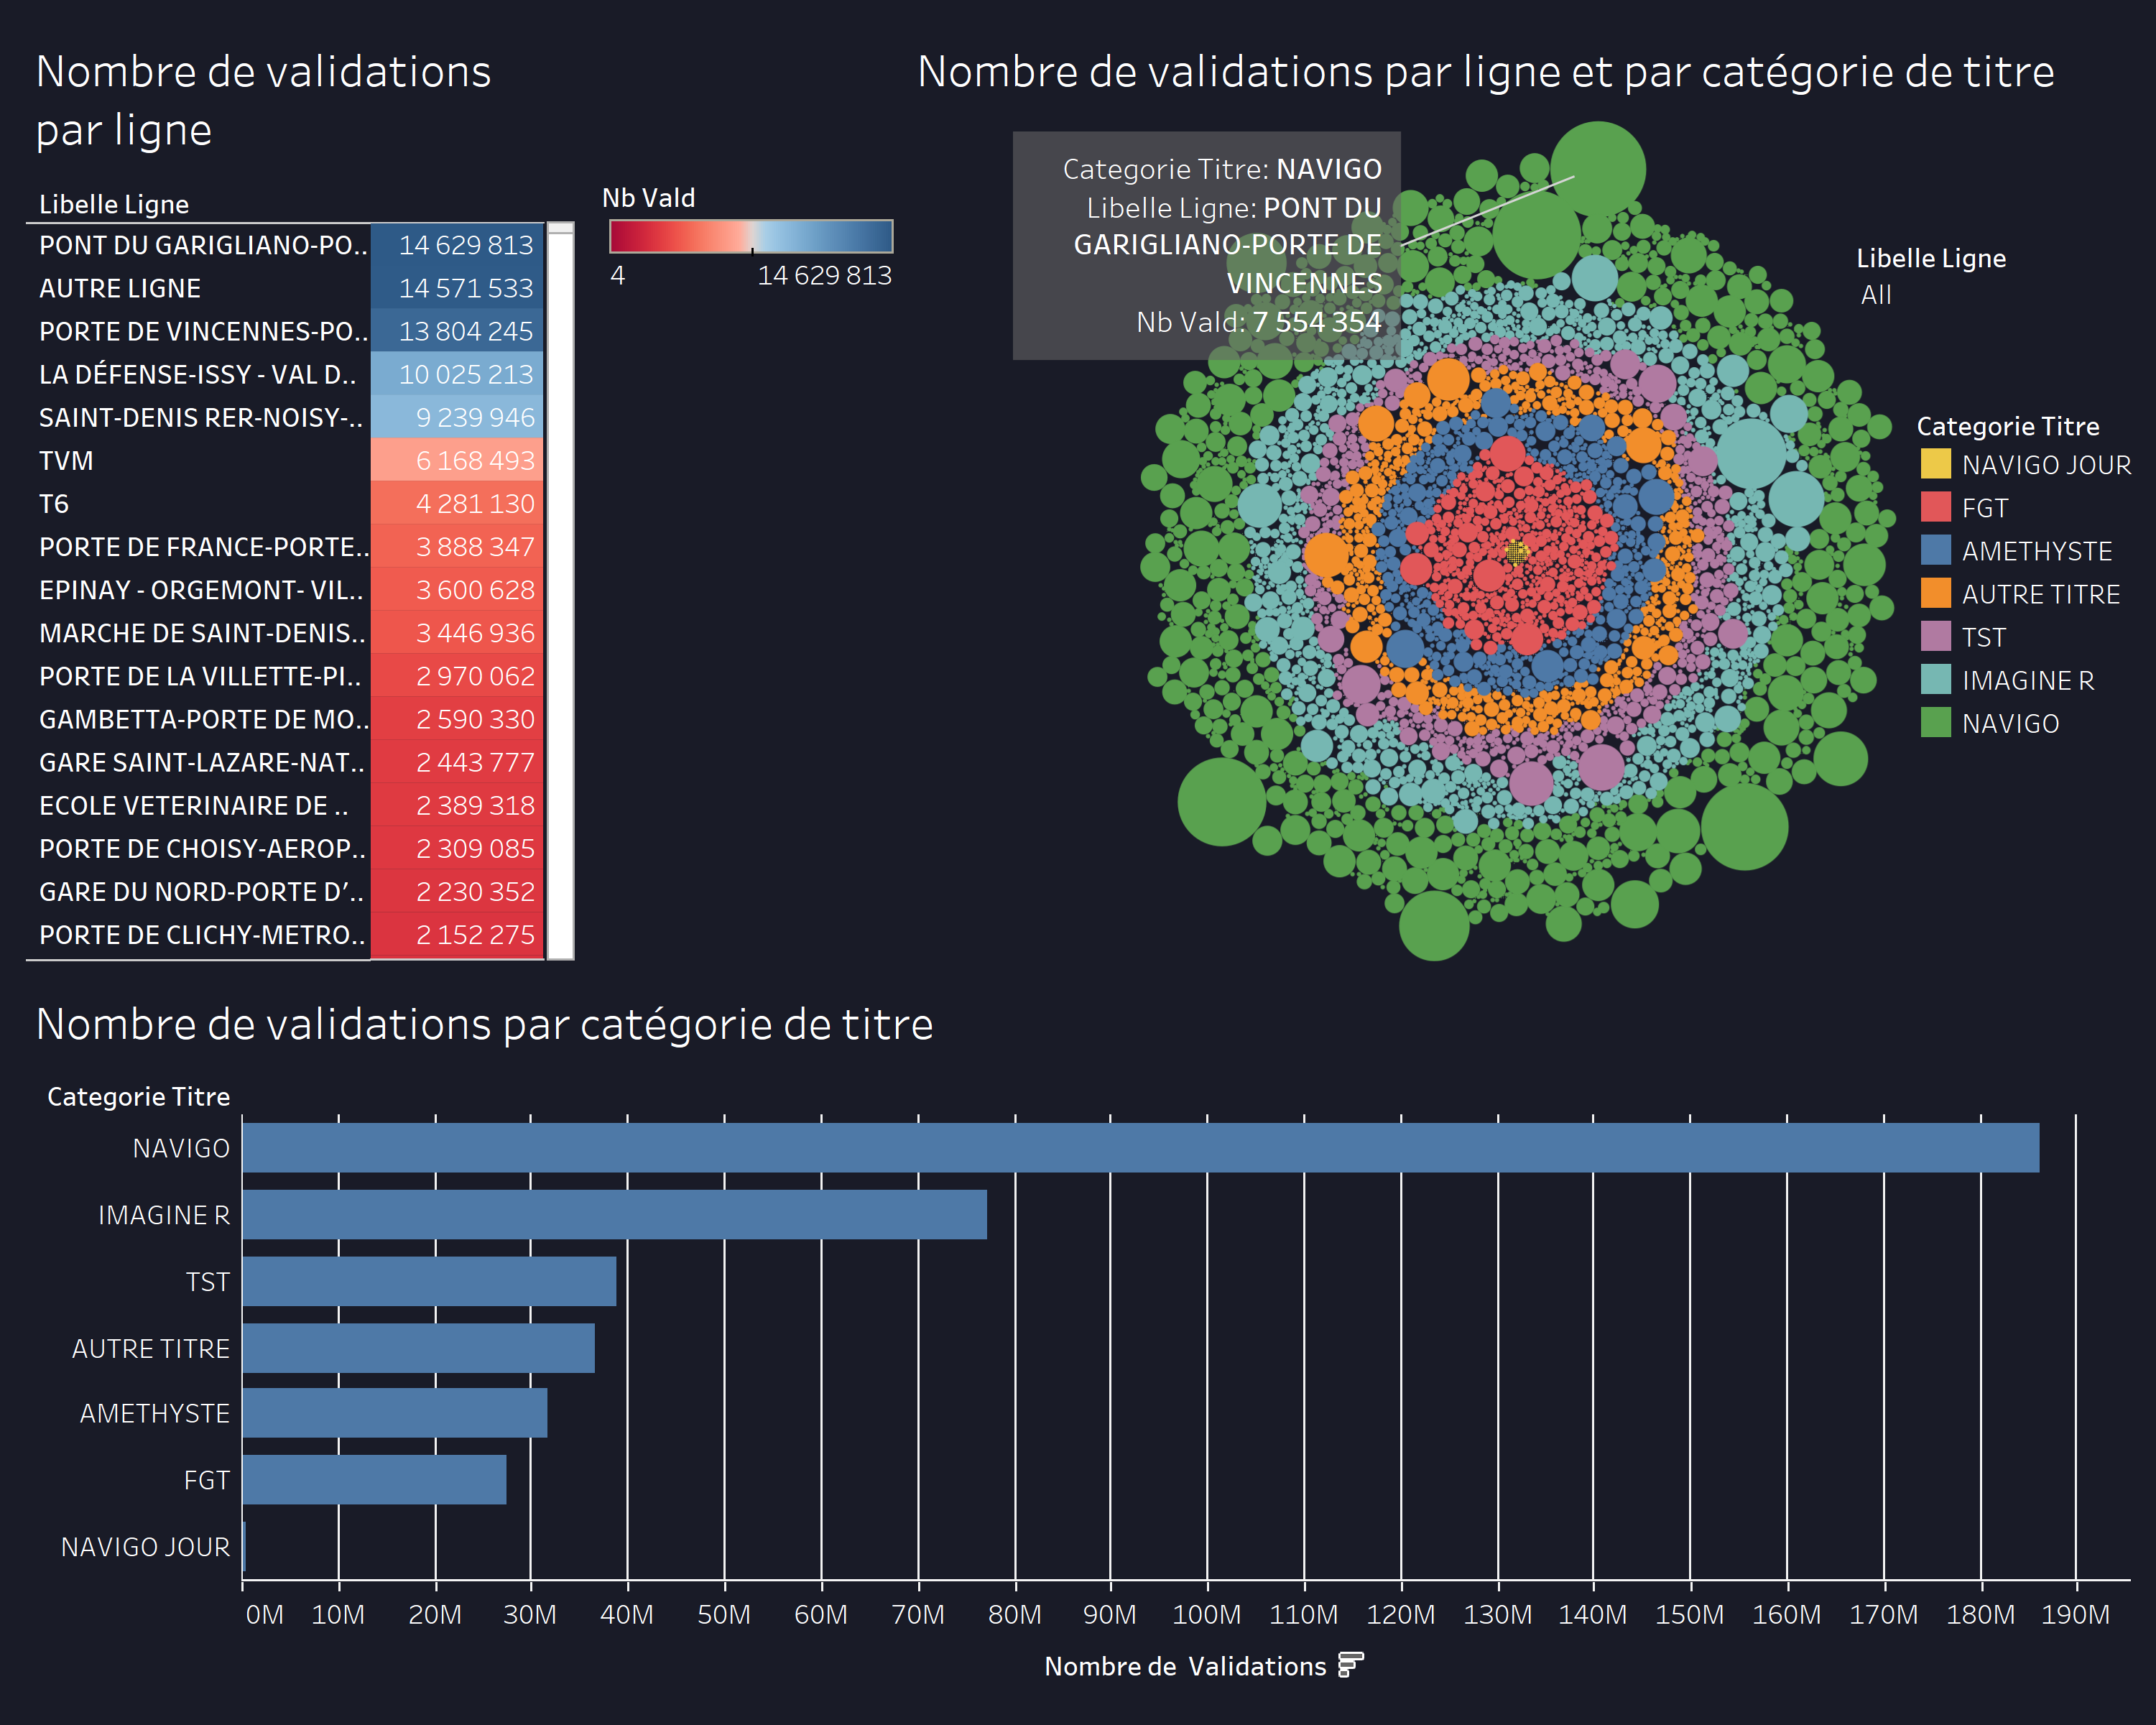

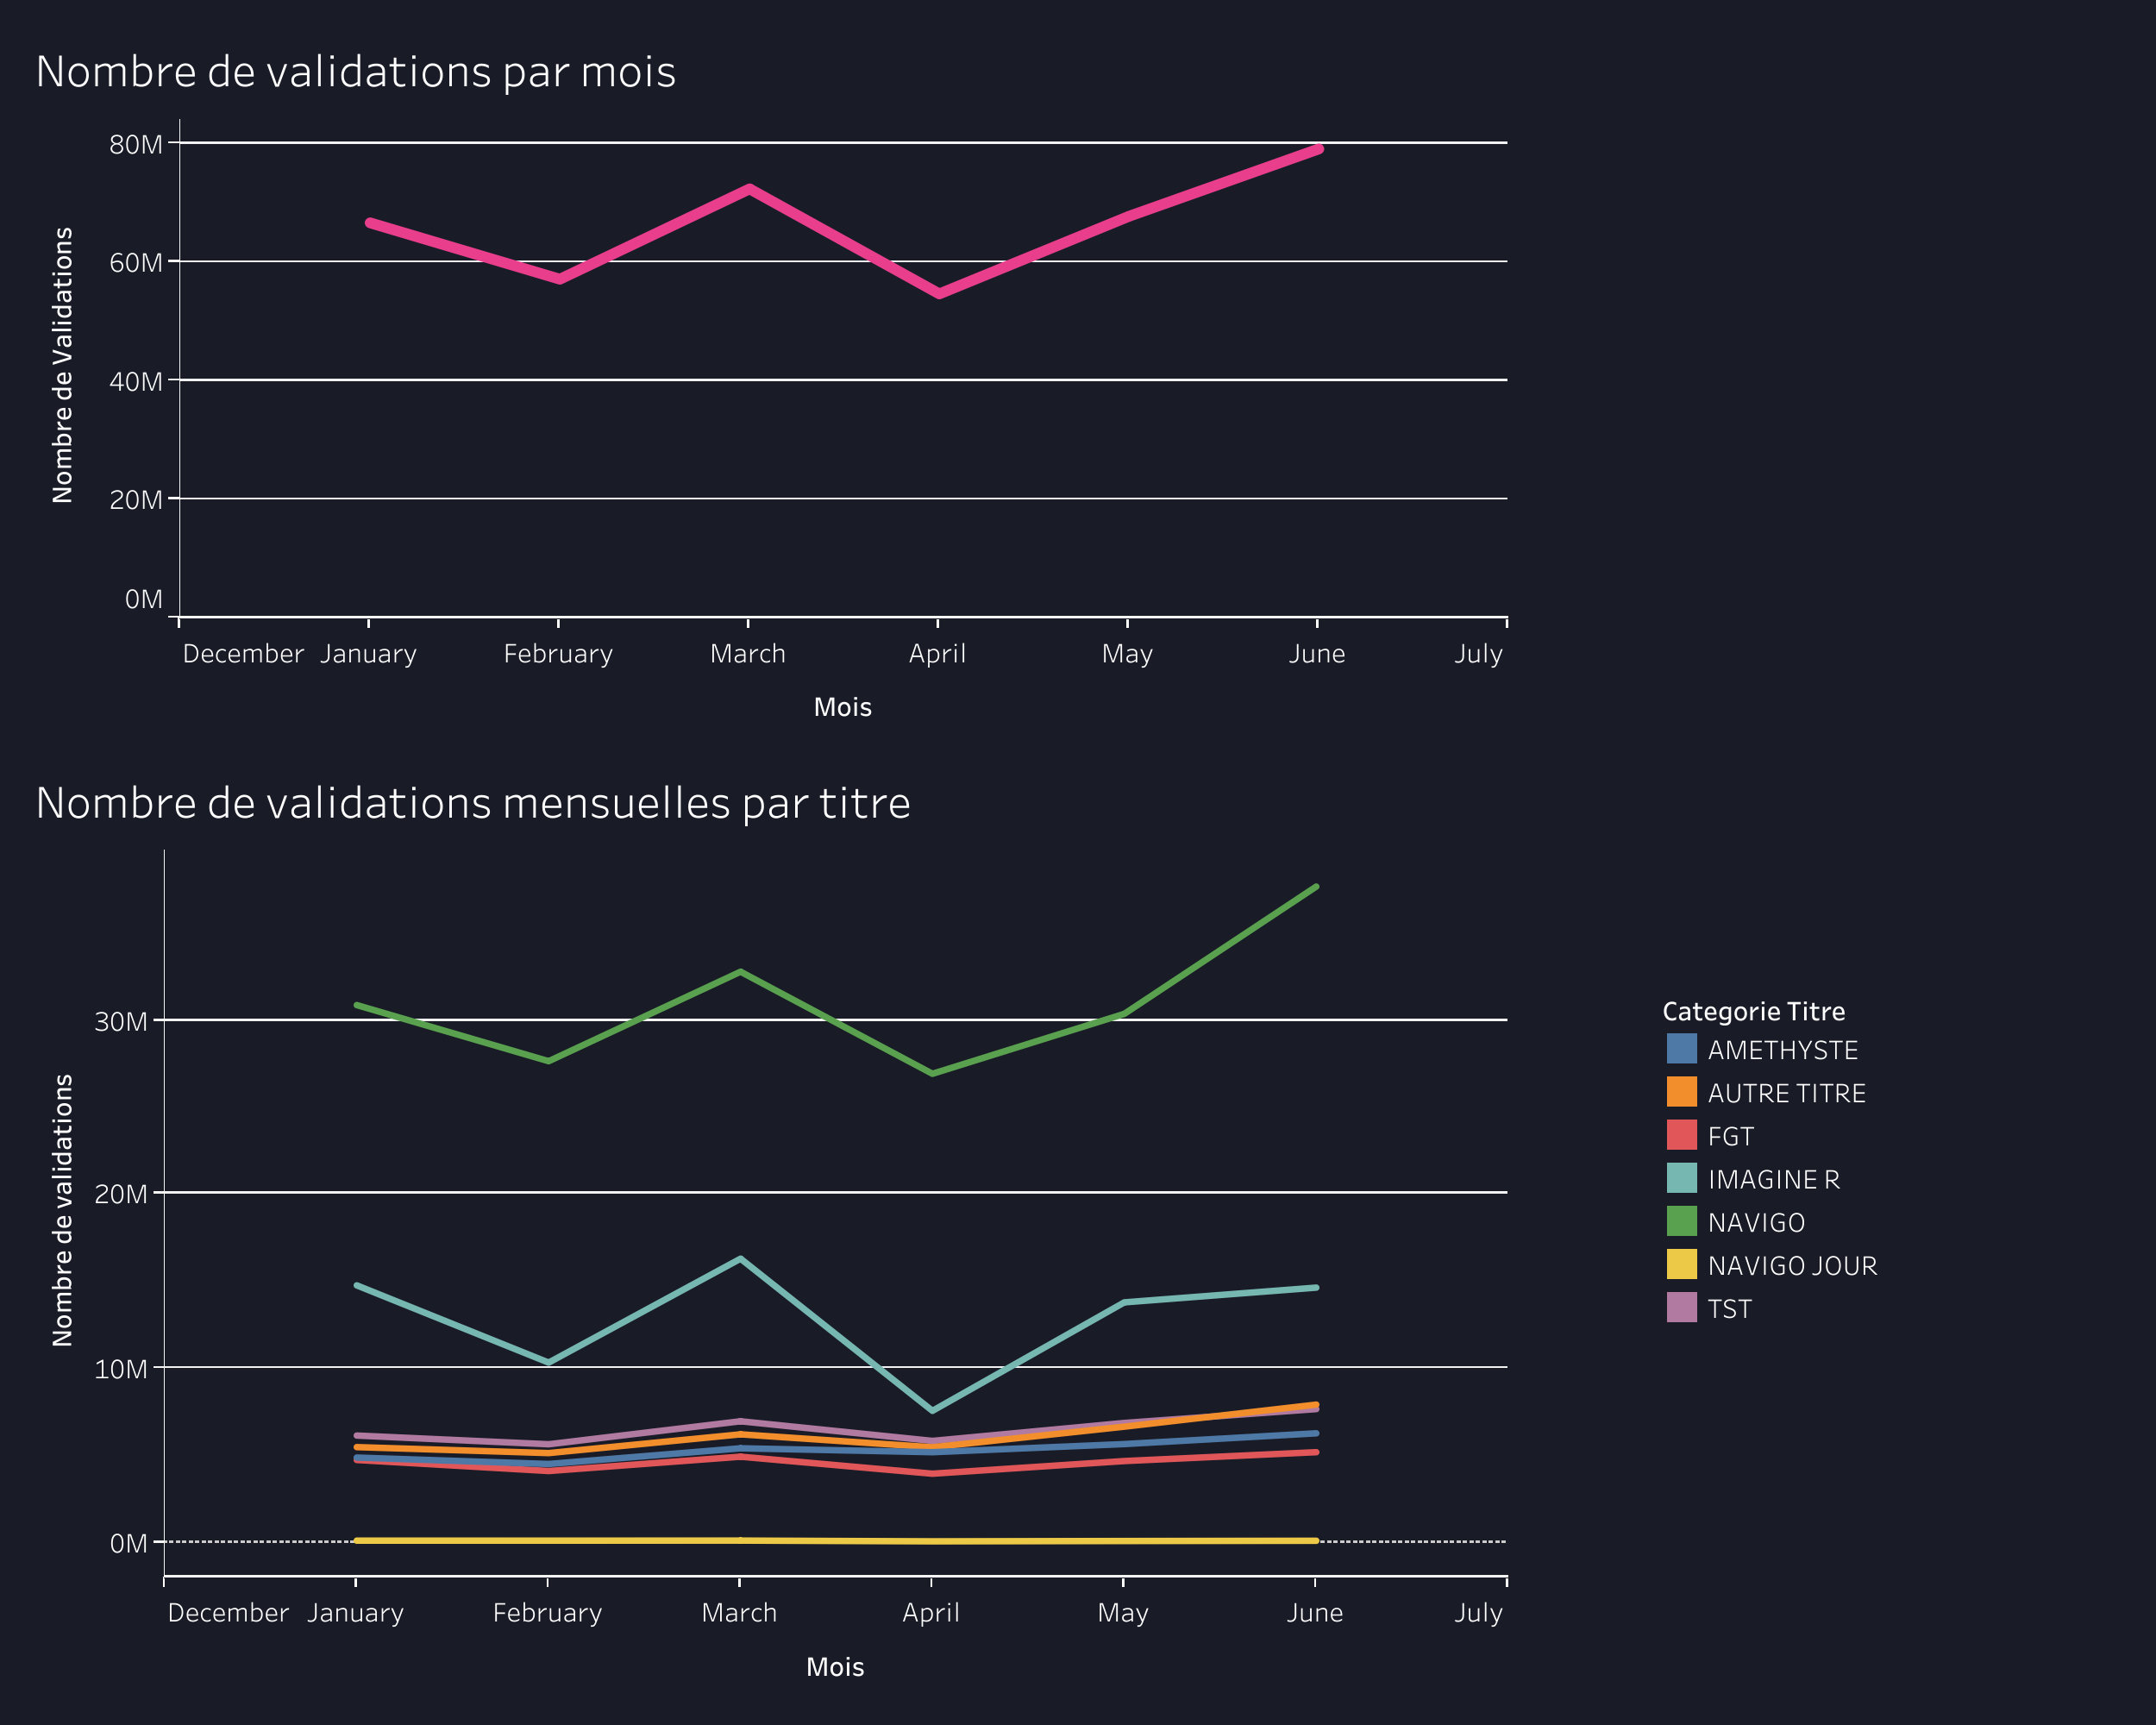

## V  Interpretation


- Sur le 1er graphe(nombre de validation par ligne de bus),la ligne de bus(pont du garigliano-porte de vincennes) a le plus grand nombre de validations ce qui signifie qu'il y a plus de trafic sur cette ligne.

- La ligne de bus avec le moins de validation(4) est la ligne PUTEAUX (La Défense Grande Arche)  - COURBEVOIE - ARGENTEUIL (Gare) donc il y a pas beaucoup de trafic sur cette ligne.Cela peut cacher des fraudes sur ce trafic.

- Sur le 3ème graphe(nombre de validation par catégorie de titre), on peut voir que le titre le plus validé(donc le plus utilisé) c'est le NAVIGO et le moins validé le NAVIGO JOUR. Cette information est très intéressante dans la mésure où elle pourra permettre de faire des prévisions sur la vente des titres à venir.

- Le 2ème graphe(nombre de validations par ligne et par titre) est une combinaison du 1er et du 3ème; on peut y voir le nombre de validation en fonction de la ligne et de la catégorie de titre.On peut encore y confirmer que c'est le NAVIGO le titre le plus validé et la ligne( pont du garigliano-porte de vincennes) celle avec le plus de validations.

- On peut voir sur le 4ème graphe que c'est le mois de Juin qui est le mois de pointe.
- Le 5ème graphe illustre la variabilité de validation des titres au cours du 1er semestre 2021. On peut voir que le schéma de variations est presque le même pour tous les titres de transport et que c'est toujours au mois de Juin que les validations sont importantes quelque soit la catégorie de titre.Cette affluence au mois de juin se traduit par l'impact des vacances d'été(départ en vacances).



Plus il y a un grand nombre de validations, plus il y a du trafic, plus il y a des voyageurs et ça permet au STIF de proposer une offre adaptée à ce nombre de voyageurs.

Imaginons par exemple, la cas de la ligne PUTEAUX (La Défense Grande Arche)  - COURBEVOIE - ARGENTEUIL (Gare) avec 4 validations , on pourrait considérer qu’il s’agit d’une ligne presque sans voyageur;il ne serait donc pas prioritaire d’améliorer le parking par exemple, ni de proposer  autre ligne de bus particulière pour la desservir.





## VI  Conclusion

Les données de validation des usagers sont également utilisées dans le cadre des contrats entre Île-de-France Mobilités et les opérateurs pour intéresser les entreprises de transport au trafic, et ainsi les inciter à mettre en place les mesures nécessaires pour augmenter la fréquentation de leurs lignes.

La validation des titres de transport permet donc d’avoir une connaissance fine du nombre de voyageurs et, ainsi, d’agir directement sur le confort et la sécurité de ces derniers.

Toutes ces informations ci-dessus vont donc permettre au STIF d'ajuster l'offre de transport(le personnel, le matériel, les équipements et les services). 




